# Run the whole deltas algorithm

In [17]:
%load_ext autoreload
%autoreload 2

import ipywidgets
from deltas.pipeline import data, classifier, evaluation
from deltas.model import base, downsample
import deltas.plotting.plots as plots

import numpy as np
np.random.seed(10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [18]:
N1 = 1000
N2 = 10
m = 1
costs = (1, 1)  # change for (1, 10) to increase results
# Gaussian (not always seperable)
data_clf = data.get_data(
    m1=[-m, -m],
    m2=[m, m],
    cov1=[[1, 0], [0, 1]],
    cov2=[[1, 0], [0, 1]],
    N1=N1,
    N2=N2,
    scale=True
    )

## Get Classifier

Baseline


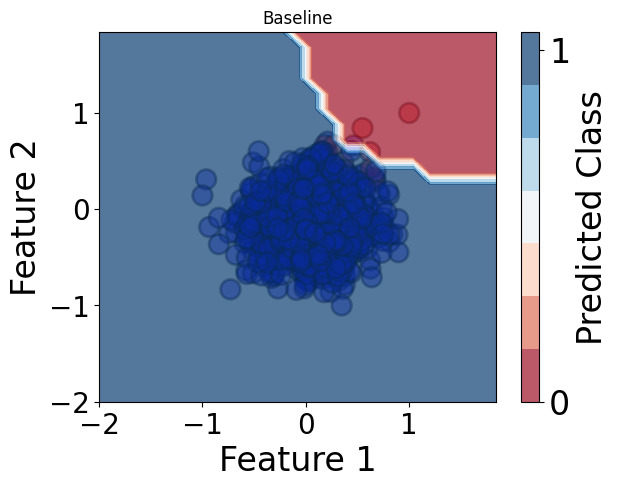

SMOTE


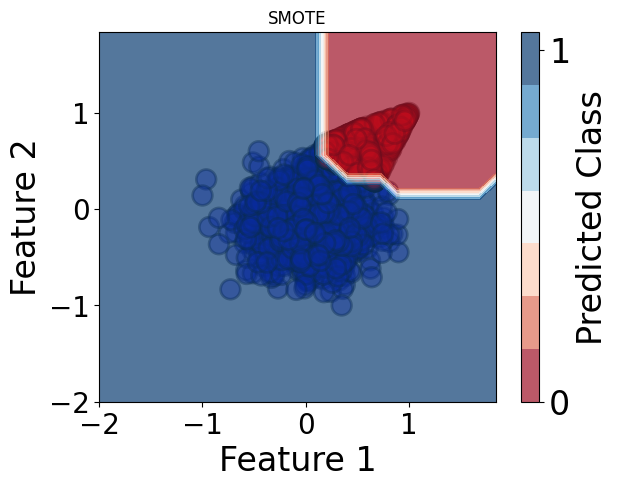

Balanced Weights


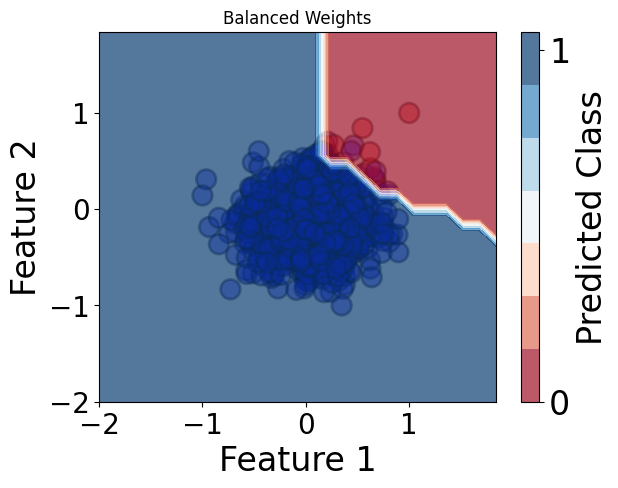

BMR


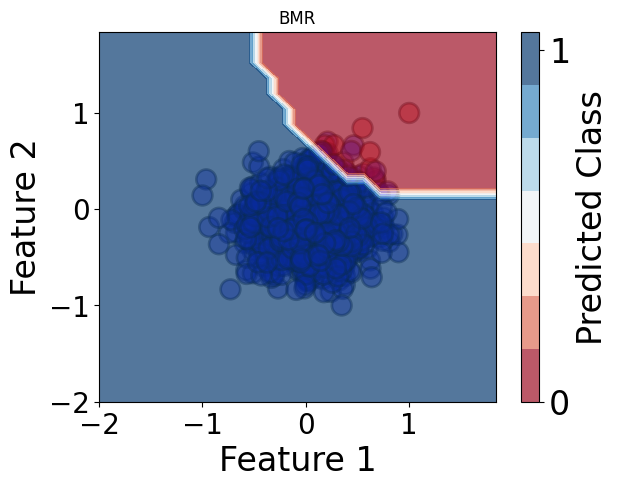

Threshold


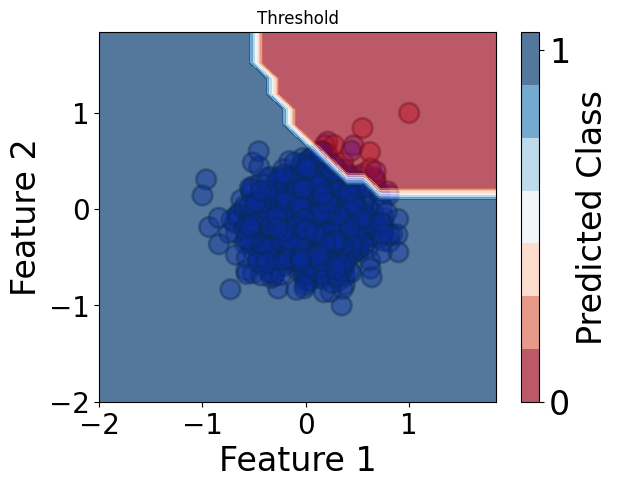

In [19]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
model = 'MLP'

classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)
data_clf['clf'] = classifiers_dict['Baseline']                    

## Fit deltas

Original Data


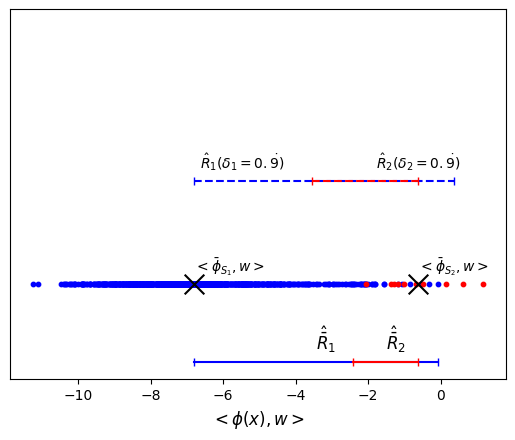

Trying random downsampling deltas (multiprocessing batches of 21):   8%|▊         | 2/24 [00:00<00:01, 15.15it/s]/home/matt/projects/linear_confidence/deltas/utils/equations.py:139: RuntimeWarning: divide by zero encountered in divide
  return f*(R/np.sqrt(N)) * (2 + np.sqrt(2*np.log(1/d)))
/home/matt/projects/linear_confidence/deltas/utils/equations.py:139: RuntimeWarning: divide by zero encountered in divide
  return f*(R/np.sqrt(N)) * (2 + np.sqrt(2*np.log(1/d)))
/home/matt/projects/linear_confidence/deltas/utils/equations.py:139: RuntimeWarning: divide by zero encountered in scalar divide
  return f*(R/np.sqrt(N)) * (2 + np.sqrt(2*np.log(1/d)))
/home/matt/projects/linear_confidence/deltas/utils/equations.py:139: RuntimeWarning: divide by zero encountered in scalar divide
  return f*(R/np.sqrt(N)) * (2 + np.sqrt(2*np.log(1/d)))
/home/matt/projects/linear_confidence/deltas/utils/equations.py:139: RuntimeWarning: divide by zero encountered in divide
  return f*(R/np.sqrt(N)) * (2 + np

Budget 505 found 354 viable downsampled solutions
Best solution found by removing 334 data points
Downsampled Data:


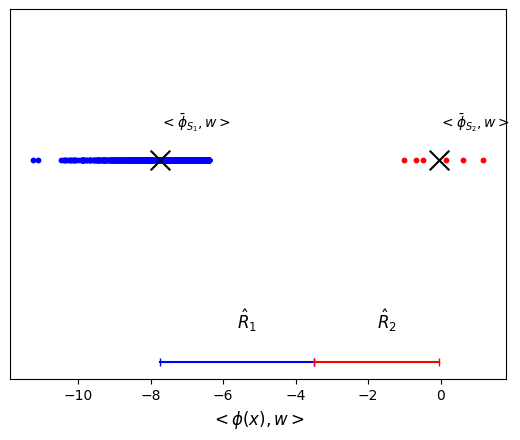

In [20]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = downsample.downsample_deltas(
#     clf).fit(X, y, _print=True, _plot=True, max_trials=10000)
# deltas_model = base.base_deltas(
#     clf).fit(X, y, grid_search=True, _print=True, _plot=True)
deltas_model = downsample.downsample_deltas(
    clf).fit(X, y, costs=costs, _print=True, _plot=True, grid_search=False)

## Plot training data information

In [21]:
# deltas_model.plot_data(data_clf)

# Evaluation on test data

                  Accuracy    G-Mean  ROC-AUC        F1
Method                                                 
Baseline           0.70315  0.637835  0.70315  0.578368
SMOTE              0.83430  0.820577  0.83430  0.804898
Balanced Weights   0.84880  0.837589  0.84880  0.824696
BMR                0.86020  0.851633  0.86020  0.840938
Threshold          0.86020  0.851633  0.86020  0.840938
Our Method         0.90870  0.907724  0.90870  0.904687 


Baseline


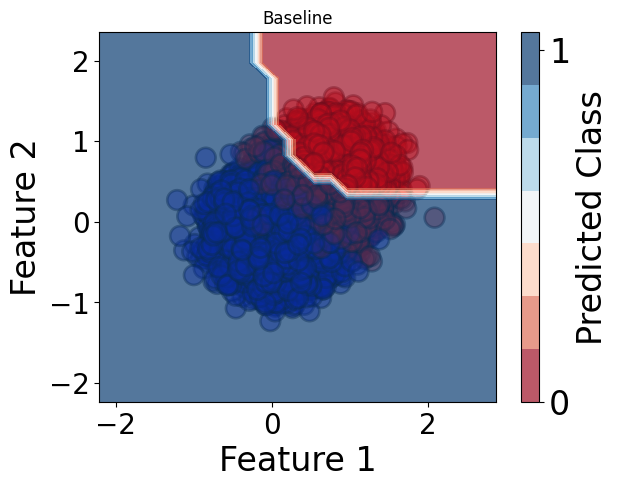

SMOTE


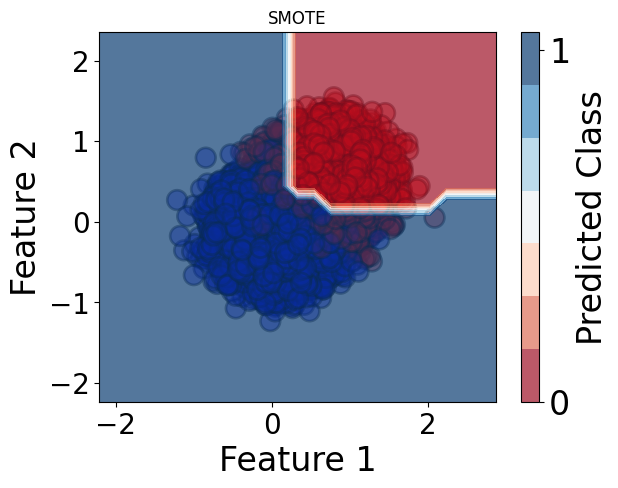

Balanced Weights


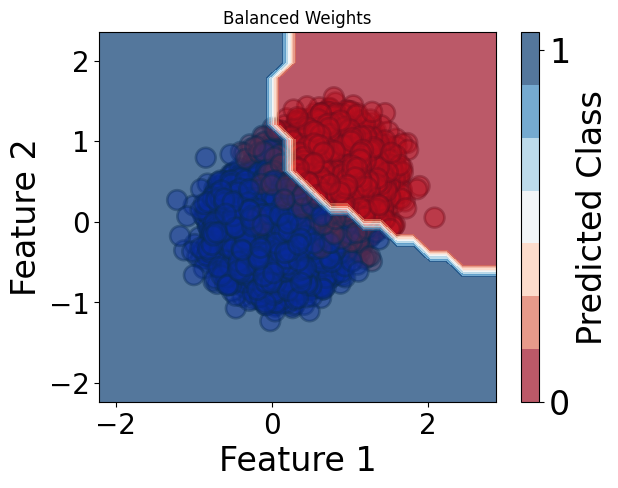

BMR


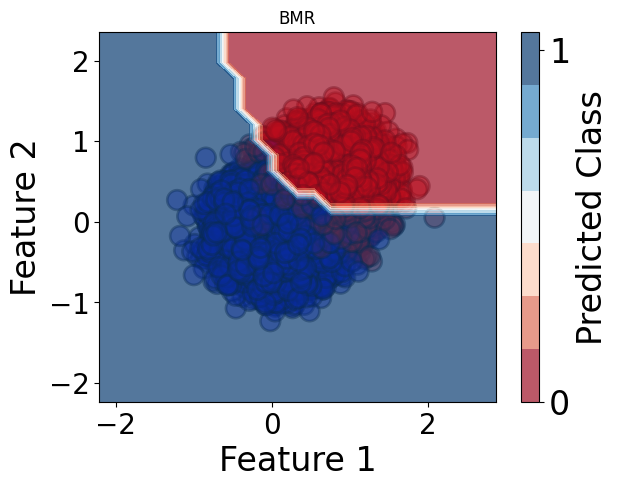

Threshold


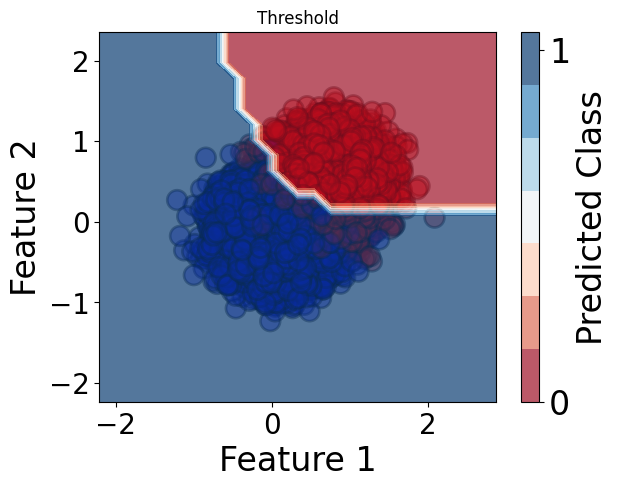

Our Method


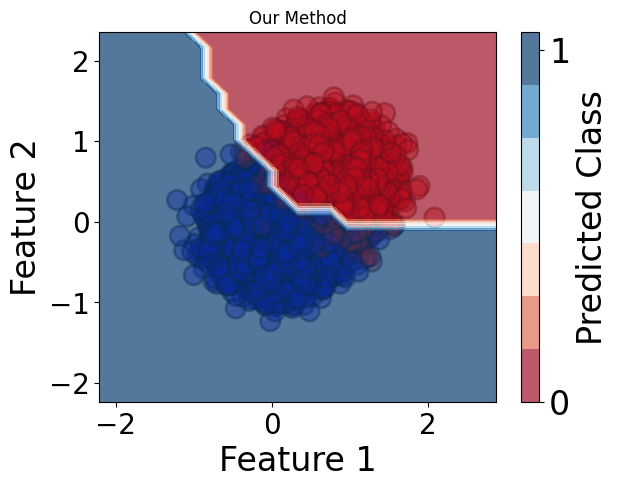

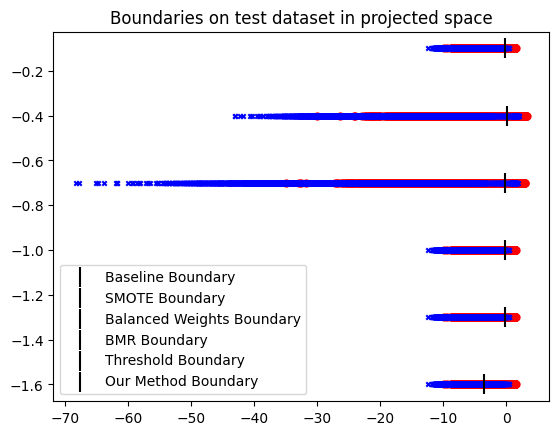

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Baseline & 0.7032 & 0.6378 & 0.7032 & 0.5784 \\
SMOTE & 0.8343 & 0.8206 & 0.8343 & 0.8049 \\
Balanced Weights & 0.8488 & 0.8376 & 0.8488 & 0.8247 \\
BMR & 0.8602 & 0.8516 & 0.8602 & 0.8409 \\
Threshold & 0.8602 & 0.8516 & 0.8602 & 0.8409 \\
Our Method & 0.9087 & 0.9077 & 0.9087 & 0.9047 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Baseline,0.70315,0.637835,0.70315,0.578368
SMOTE,0.83430,0.820577,0.83430,0.804898
Balanced Weights,0.84880,0.837589,0.84880,0.824696
BMR,0.86020,0.851633,0.86020,0.840938
Threshold,0.86020,0.851633,0.86020,0.840938
Our Method,0.90870,0.907724,0.90870,0.904687


In [22]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=True)